# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [4]:
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
city_name = "Holmdel"
weather_reply = requests.get(query_url + city_name).json()
weather_reply

{'coord': {'lon': -74.18, 'lat': 40.35},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 18.39,
  'feels_like': 13.26,
  'temp_min': 16,
  'temp_max': 20,
  'pressure': 1015,
  'humidity': 25},
 'visibility': 16093,
 'wind': {'speed': 4.1, 'deg': 300, 'gust': 7.7},
 'clouds': {'all': 1},
 'dt': 1586205702,
 'sys': {'type': 1,
  'id': 5065,
  'country': 'US',
  'sunrise': 1586169085,
  'sunset': 1586215566},
 'timezone': -14400,
 'id': 5101305,
 'name': 'Holmdel',
 'cod': 200}

In [6]:
city = []
lat = []
lon = []
temp = []
humidity = []
clouds = []
windspeed = []
temp_max = []


    # Loop through the list of cities and perform a request for data on each
for city_name in cities:
    try:
        response = requests.get(query_url + city_name).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        temp_max.append(response['main']['temp_max'])
        city.append(city_name)
    except (KeyError, ValueError, IndexError):
        print("Data for line item missing, skipping...")      

Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...
Data for line item missing, skipping...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "city": city,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "humidity": humidity,
    "clouds": clouds,
    "windspeed": windspeed,
    "temp_max": temp_max
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,lon,temp,humidity,clouds,windspeed,temp_max
0,talcahuano,-36.72,-73.12,20.00,45,0,8.20,20.00
1,jamestown,42.10,-79.24,12.80,26,1,2.60,15.56
2,clyde river,70.47,-68.59,-10.00,72,20,15.90,-10.00
3,goldsboro,35.38,-77.99,27.25,37,20,3.60,28.89
4,owo,7.20,5.59,25.66,79,100,2.81,25.66
...,...,...,...,...,...,...,...,...
564,wamba,8.93,8.60,28.90,57,15,1.60,28.90
565,rundu,-17.93,19.77,23.00,73,2,1.00,23.00
566,taltal,-25.40,-70.48,21.99,61,9,1.73,21.99
567,poum,-20.23,164.02,25.82,76,86,5.81,25.82


In [8]:
# save dataframe to a csv file
weather_data.to_csv(output_data_file, index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

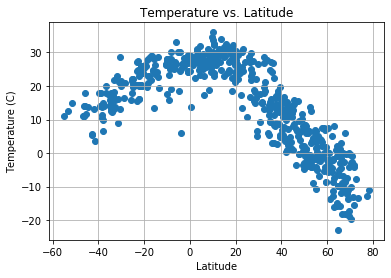

In [9]:
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/TemperatureVsLatitude.png")

plt.show()

#### Latitude vs. Humidity Plot

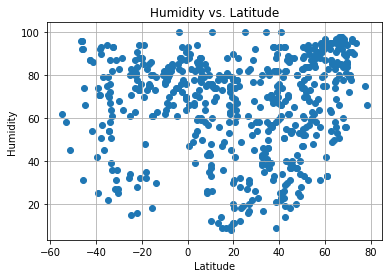

In [10]:
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/HumidityVsLatitude.png")

plt.show()

#### Latitude vs. Cloudiness Plot

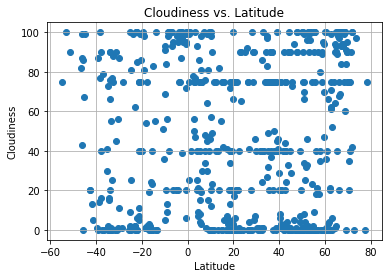

In [11]:
plt.scatter(weather_data["lat"], weather_data["clouds"], marker="o")

plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/CloudinessVsLatitude.png")

plt.show()

#### Latitude vs. Wind Speed Plot

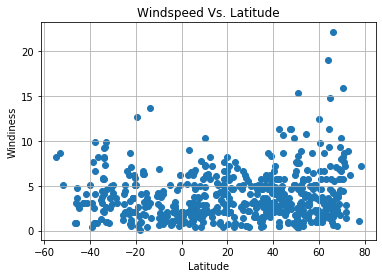

In [12]:
plt.scatter(weather_data["lat"], weather_data["windspeed"], marker="o")

plt.title("Windspeed Vs. Latitude")
plt.ylabel("Windiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/WindinessVsLatitude.png")

plt.show()

## Linear Regression

Linear Regression: Latitude vs. Temperature
--------------------------------------------------
y = -0.26x +19.54
r-squared = -0.6613593492706356


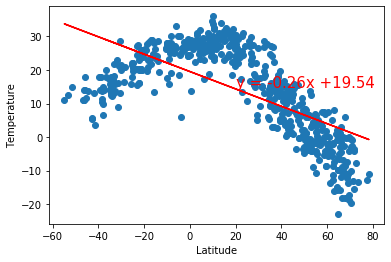

Linear Regression: Latitude vs. Humidity
--------------------------------------------------
y = 0.05x +65.54
r-squared = 0.06798845359514782


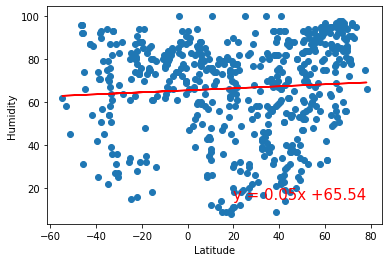

Linear Regression: Latitude vs. Cloudiness
--------------------------------------------------
y = 0.05x +45.86
r-squared = 0.040202659199173624


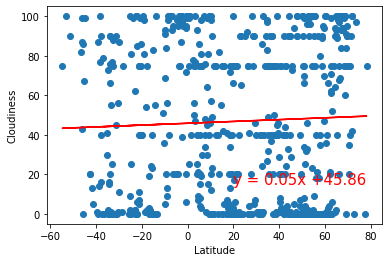

Linear Regression: Latitude vs. Windiness
--------------------------------------------------
y = 0.01x +3.64
r-squared = 0.11341971798932185


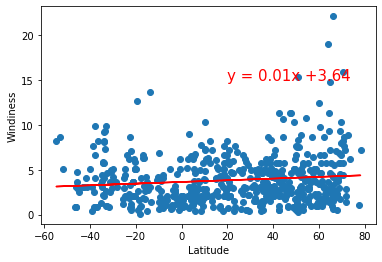

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

y_dimen = ["temp", "humidity", "clouds", "windspeed"]
x_values = weather_data["lat"]

y_values = weather_data["temp"],

for y_values in y_dimen:
    
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, weather_data[y_values])

    # Get regression values
    regress_values = x_values * slope + intercept
    #print(regress_values)

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    

    # Create Plot
    plt.scatter(x_values,weather_data[y_values])
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    
    if y_values == "temp":
        plt.ylabel('Temperature')
        regress_title = "Linear Regression: Latitude vs. Temperature"
        
    elif y_values == "humidity":
        plt.ylabel('Humidity')
        regress_title = "Linear Regression: Latitude vs. Humidity"
        
    elif y_values == "clouds":
        plt.ylabel('Cloudiness')
        regress_title = "Linear Regression: Latitude vs. Cloudiness"
        
    elif y_values == "windspeed":
        plt.ylabel('Windiness')
        regress_title = "Linear Regression: Latitude vs. Windiness"
        
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

    # Print r square value
    print(regress_title)
    print("--"* 25)
    print(line_eq)
    print(f"r-squared = {rvalue}")
    
    # Show plot
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
weather_data["Hemisphere"] = ""
for i in range(len(weather_data)):
    if weather_data["lat"][i] > 0:
        weather_data["Hemisphere"][i] = "Northern"
    elif weather_data["lat"][i] < 0:
        weather_data["Hemisphere"][i] = "Southern"
    else:
        weather_data["Hemisphere"][i] = "Equator"

northern_df = pd.DataFrame(weather_data.loc[weather_data["Hemisphere"] == "Northern",])
southern_df = pd.DataFrame(weather_data.loc[weather_data["Hemisphere"] == "Southern",])

/opt/miniconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/miniconda3/envs/PythonData2/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

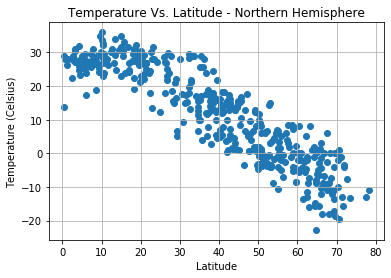

In [16]:
plt.scatter(northern_df["lat"], northern_df["temp_max"], marker="o")

plt.title("Temperature Vs. Latitude - Northern Hemisphere")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/NorthernTemperatureVsLatitude.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

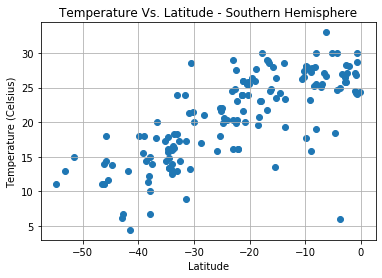

In [17]:
plt.scatter(southern_df["lat"], southern_df["temp_max"], marker="o")

plt.title("Temperature Vs. Latitude - Southern Hemisphere")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/SouthernTemperatureVsLatitude.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

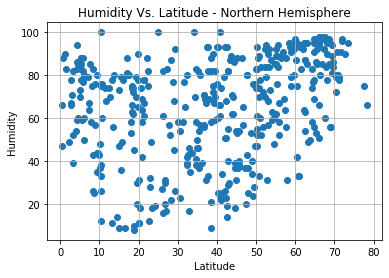

In [18]:
plt.scatter(northern_df["lat"], northern_df["humidity"], marker="o")

plt.title("Humidity Vs. Latitude - Northern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/NorthernHumidityVsLatitude.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

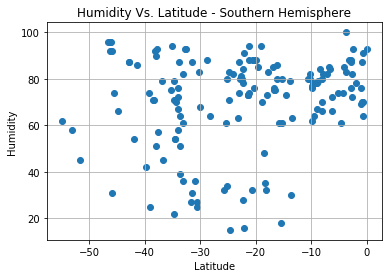

In [19]:
plt.scatter(southern_df["lat"], southern_df["humidity"], marker="o")

plt.title("Humidity Vs. Latitude - Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/SouthernHumidityVsLatitude.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

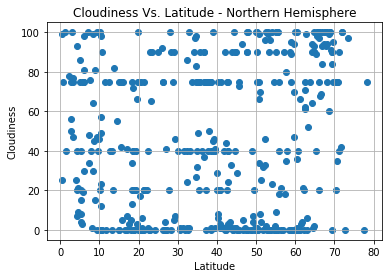

In [20]:
plt.scatter(northern_df["lat"], northern_df["clouds"], marker="o")

plt.title("Cloudiness Vs. Latitude - Northern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/NorthernCloudinessVsLatitude.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

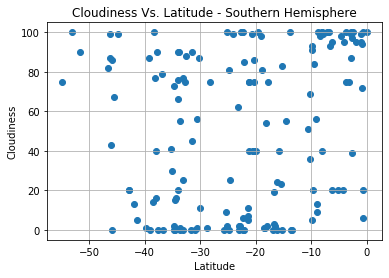

In [21]:
plt.scatter(southern_df["lat"], southern_df["clouds"], marker="o")

plt.title("Cloudiness Vs. Latitude - Southern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/SouthernCloudinessVsLatitude.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

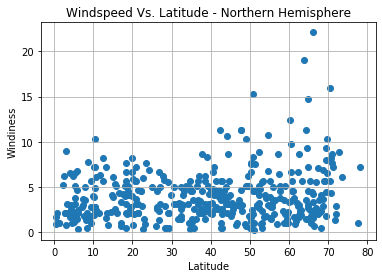

In [22]:
plt.scatter(northern_df["lat"], northern_df["windspeed"], marker="o")

plt.title("Windspeed Vs. Latitude - Northern Hemisphere")
plt.ylabel("Windiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/WindinessVsLatitude.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

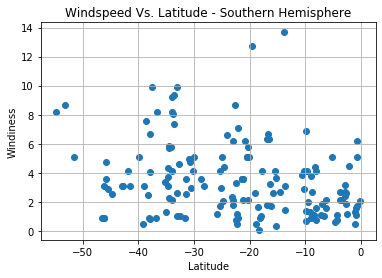

In [23]:
plt.scatter(southern_df["lat"], southern_df["windspeed"], marker="o")

plt.title("Windspeed Vs. Latitude - Southern Hemisphere")
plt.ylabel("Windiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/WindinessVsLatitude.png")

plt.show()